In [4]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

df_Customer = pd.read_csv(r'Customer_ID.csv')
df_City = pd.read_csv(r'City.csv')
df_Transaction = pd.read_csv(r'Transaction_ID.csv')
df_Cab = pd.read_csv(r'Cab_Data.csv')

In [102]:
df_Cab

Transaction ID Date of Travel     Company           City  \
0             10000011     08-01-2016    Pink Cab     ATLANTA GA   
1             10000012     06-01-2016    Pink Cab     ATLANTA GA   
2             10000013     02-01-2016    Pink Cab     ATLANTA GA   
3             10000014     07-01-2016    Pink Cab     ATLANTA GA   
4             10000015     03-01-2016    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     08-01-2018  Yellow Cab  WASHINGTON DC   
359388        10440104     04-01-2018  Yellow Cab  WASHINGTON DC   
359389        10440105     05-01-2018  Yellow Cab  WASHINGTON DC   
359390        10440106     05-01-2018  Yellow Cab  WASHINGTON DC   
359391        10440107     02-01-2018  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540  
2               9.04         125.20       97.6320  
3              33.17         377.40      351.6020  
4               8.73         114.62       97.7760  
...              ...            ...           ...  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192  

[359392 rows x 7 columns]

In [103]:
df_City

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [104]:
df_Customer

Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]

In [105]:
df_Transaction

Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]

In [98]:
Customer_profile = ProfileReport(df_Customer, title="Customer Profiling Report")
City_profile = ProfileReport(df_City, title="City Profiling Report")
Transaction_profile = ProfileReport(df_Transaction, title="Transaction Profiling Report")
Cab_profile = ProfileReport(df_Cab, title="Cab Profiling Report")

In [99]:
Customer_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
City_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [101]:
Cab_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [107]:
df_inner = pd.merge(df_Cab, df_Transaction, on=["Transaction ID"], how="inner")

df_Cab_Customer = pd.merge(df_inner, df_Customer, on=["Customer ID"], how="inner")

df_Everything = pd.merge(df_Cab_Customer, df_City, on=["City"], how="inner")

df_Everything['Date of Travel'] = pd.to_datetime(df_Everything['Date of Travel'], dayfirst=True)

df_Everything['Year'] = df_Everything['Date of Travel'].dt.year

df_Everything['Month'] = df_Everything['Date of Travel'].dt.month

df_Everything['Profits'] = df_Everything['Price Charged'] - df_Everything['Cost of Trip']

df_Everything['Profits Per KM'] = (df_Everything['Price Charged'] - df_Everything['Cost of Trip'])/df_Everything['KM Travelled']

df_Everything['Profit Percentage'] = ((df_Everything['Price Charged'] - df_Everything['Cost of Trip'])/df_Everything['Cost of Trip'])*100

Everything_Yellow = df_Everything[df_Everything['Company']=='Yellow Cab']

Everything_Pink = df_Everything[df_Everything['Company']=='Pink Cab']

Yellow_2016 = Everything_Yellow[Everything_Yellow['Year']==2016]
Yellow_2017 = Everything_Yellow[Everything_Yellow['Year']==2017]
Yellow_2018 = Everything_Yellow[Everything_Yellow['Year']==2018]

Pink_2016 = Everything_Pink[Everything_Pink['Year']==2016]
Pink_2017 = Everything_Pink[Everything_Pink['Year']==2017]
Pink_2018 = Everything_Pink[Everything_Pink['Year']==2018]

df_Everything

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10351127     2018-07-21  Yellow Cab     ATLANTA GA   
2             10412921     2018-11-23  Yellow Cab     ATLANTA GA   
3             10000012     2016-01-06    Pink Cab     ATLANTA GA   
4             10320494     2018-04-21  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10307228     2018-03-03  Yellow Cab  WASHINGTON DC   
359388        10319775     2018-04-13  Yellow Cab  WASHINGTON DC   
359389        10347676     2018-07-06  Yellow Cab  WASHINGTON DC   
359390        10358624     2018-08-02  Yellow Cab  WASHINGTON DC   
359391        10370709     2018-08-30  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              26.19         598.70      317.4228        29290         Cash   
2              42.55         792.05      597.4020        29290         Card   
3              28.62         358.52      334.8540        27703         Card   
4              36.38         721.10      467.1192        27703         Card   
...              ...            ...           ...          ...          ...   
359387         38.40         668.93      525.3120        51406         Cash   
359388          3.57          67.60       44.5536        51406         Cash   
359389         23.46         331.97      337.8240        51406         Card   
359390         27.60         358.23      364.3200        51406         Cash   
359391         34.24         453.11      427.3152        51406         Card   

        Gender  Age  Income (USD/Month) Population      Users  Year  Month  \
0         Male   28               10813   814,885     24,701   2016      1   
1         Male   28               10813   814,885     24,701   2018      7   
2         Male   28               10813   814,885     24,701   2018     11   
3         Male   27                9237   814,885     24,701   2016      1   
4         Male   27                9237   814,885     24,701   2018      4   
...        ...  ...                 ...        ...        ...   ...    ...   
359387  Female   29                6829   418,859    127,001   2018      3   
359388  Female   29                6829   418,859    127,001   2018      4   
359389  Female   29                6829   418,859    127,001   2018      7   
359390  Female   29                6829   418,859    127,001   2018      8   
359391  Female   29                6829   418,859    127,001   2018      8   

         Profits  Profits Per KM  Profit Percentage  
0        57.3150        1.882266          18.274427  
1       281.2772       10.739870          88.612790  
2       194.6480        4.574571          32.582415  
3        23.6660        0.826904           7.067558  
4       253.9808        6.981330          54.371732  
...          ...             ...                ...  
359387  143.6180        3.740052          27.339562  
359388   23.0464        6.455574          51.727358  
359389   -5.8540       -0.249531          -1.732855  
359390   -6.0900       -0.220652          -1.671607  
359391   25.7948        0.753353           6.036481  

[359392 rows x 19 columns]

In [55]:
df_Everything.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer ID            Age  Income (USD/Month)           Year  \
count  359392.000000  359392.000000       359392.000000  359392.000000   
mean    19191.652115      35.336705        15048.822937    2017.045199   
std     21012.412463      12.594234         7969.409482       0.800239   
min         1.000000      18.000000         2000.000000    2016.000000   
25%      2705.000000      25.000000         8424.000000    2016.000000   
50%      7459.000000      33.000000        14685.000000    2017.000000   
75%     36078.000000      42.000000        21035.000000    2018.000000   
max     60000.000000      65.000000        35000.000000    2018.000000   

               Month        Profits  Profits Per KM  
count  359392.000000  359392.000000   359392.000000  
mean        7.500434     137.253198        6.083579  
std         3.445095     160.311840        5.543493  
min         1.000000    -220.060000       -4.998235  
25%         5.000000      28.012000        2.000385  
50%         8.000000      81.962000        4.466809  
75%        10.000000     190.030000        9.170006  
max        12.000000    1463.966000       41.115556

In [56]:
df_Everything.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Year                           int64
Month                          int64
Profits                      float64
Profits Per KM               float64
dtype: object

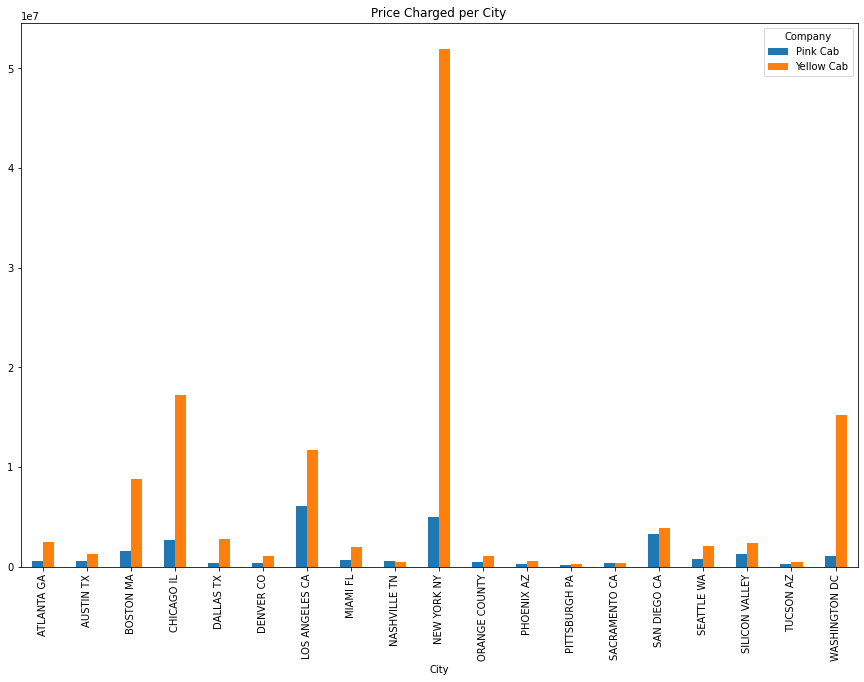

Company           Pink Cab   Yellow Cab
City                                   
ATLANTA GA       532355.80   2447885.92
AUSTIN TX        598572.71   1278569.79
BOSTON MA       1558660.02   8801095.40
CHICAGO IL      2636186.14  17205132.38
DALLAS TX        358835.40   2783594.51
DENVER CO        385026.22   1077505.29
LOS ANGELES CA  6071225.76  11724398.65
MIAMI FL         652664.63   1927470.57
NASHVILLE TN     519277.05    439831.08
NEW YORK NY     4987254.36  51966807.31
ORANGE COUNTY    472096.66   1082776.55
PHOENIX AZ       242197.74    514484.90
PITTSBURGH PA    186785.72    255752.92
SACRAMENTO CA    387007.82    374604.13
SAN DIEGO CA    3286316.40   3850064.19
SEATTLE WA       795623.69   2058692.57
SILICON VALLEY  1292411.50   2391690.65
TUCSON AZ        258247.63    414332.63
WASHINGTON DC   1107506.08  15259197.75


In [108]:
PriceCharged = df_Everything.groupby(['City', 'Company'])['Price Charged'].sum().unstack()

PriceCharged.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Price Charged per City')
plt.show()
print(PriceCharged)

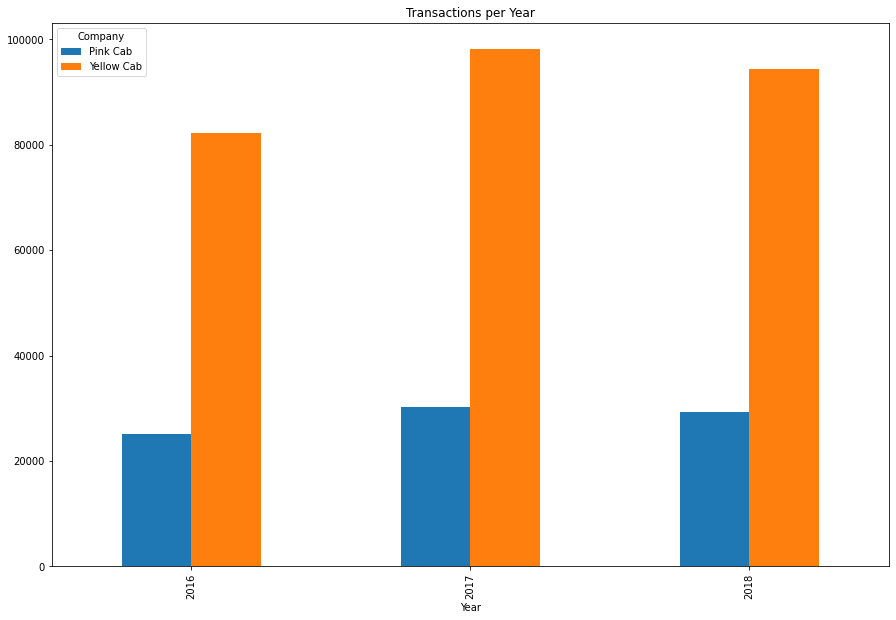

Company  Pink Cab  Yellow Cab
Year                         
2016        25080       82239
2017        30321       98189
2018        29310       94253


In [80]:
YearTransactions = df_Everything.groupby(['Year','Company'])['Transaction ID'].count().unstack()
YearTransactions.plot(kind='bar',stacked = False, figsize=(15,10))
plt.title('Transactions per Year')
plt.show()
print(YearTransactions)

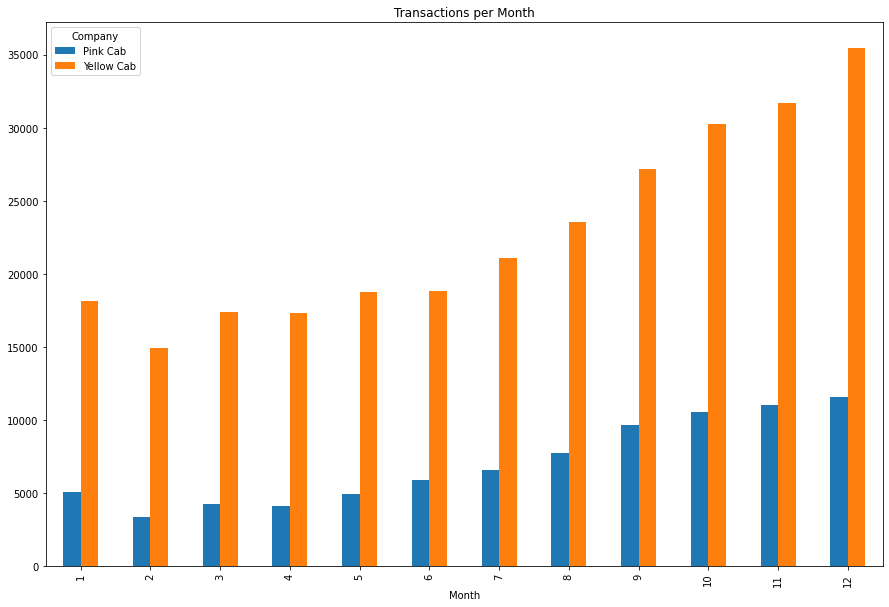

Company  Pink Cab  Yellow Cab
Month                        
1            5057       18117
2            3375       14932
3            4223       17423
4            4083       17351
5            4960       18741
6            5877       18836
7            6590       21086
8            7739       23584
9            9658       27201
10          10576       30276
11          11005       31695
12          11568       35439


In [79]:
MonthTransactions = df_Everything.groupby(['Month','Company'])['Transaction ID'].count().unstack()
MonthTransactions.plot(kind='bar',stacked = False, figsize=(15,10))
plt.title('Transactions per Month')
plt.show()
print(MonthTransactions)

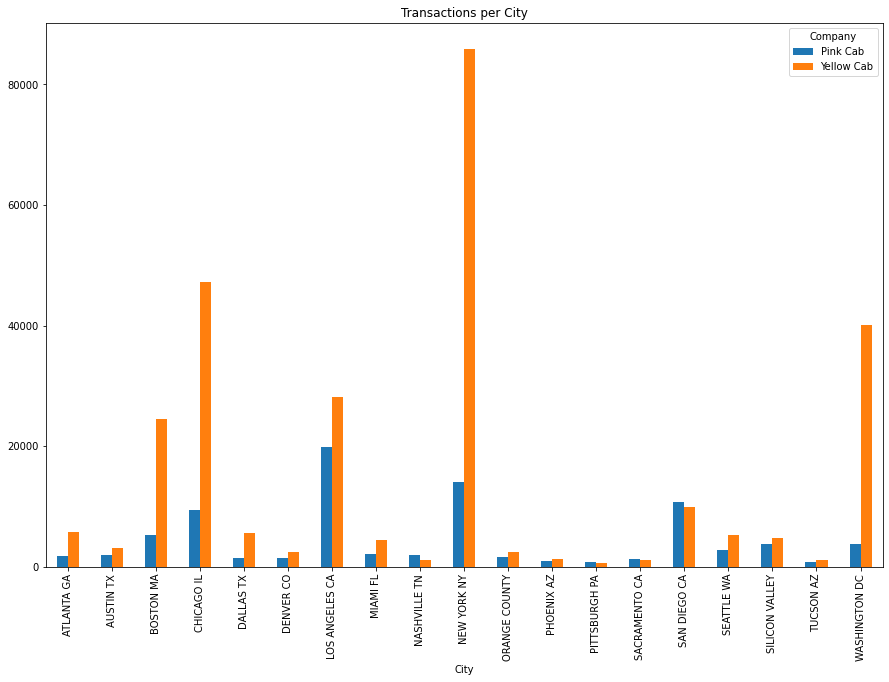

Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA          1762        5795
AUSTIN TX           1868        3028
BOSTON MA           5186       24506
CHICAGO IL          9361       47264
DALLAS TX           1380        5637
DENVER CO           1394        2431
LOS ANGELES CA     19865       28168
MIAMI FL            2002        4452
NASHVILLE TN        1841        1169
NEW YORK NY        13967       85918
ORANGE COUNTY       1513        2469
PHOENIX AZ           864        1200
PITTSBURGH PA        682         631
SACRAMENTO CA       1334        1033
SAN DIEGO CA       10672        9816
SEATTLE WA          2732        5265
SILICON VALLEY      3797        4722
TUCSON AZ            799        1132
WASHINGTON DC       3692       40045


In [74]:
TotalTrans = df_Everything.groupby(['City', 'Company'])['Transaction ID'].count().unstack()

TotalTrans.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Transactions per City')
plt.show()
print(TotalTrans)

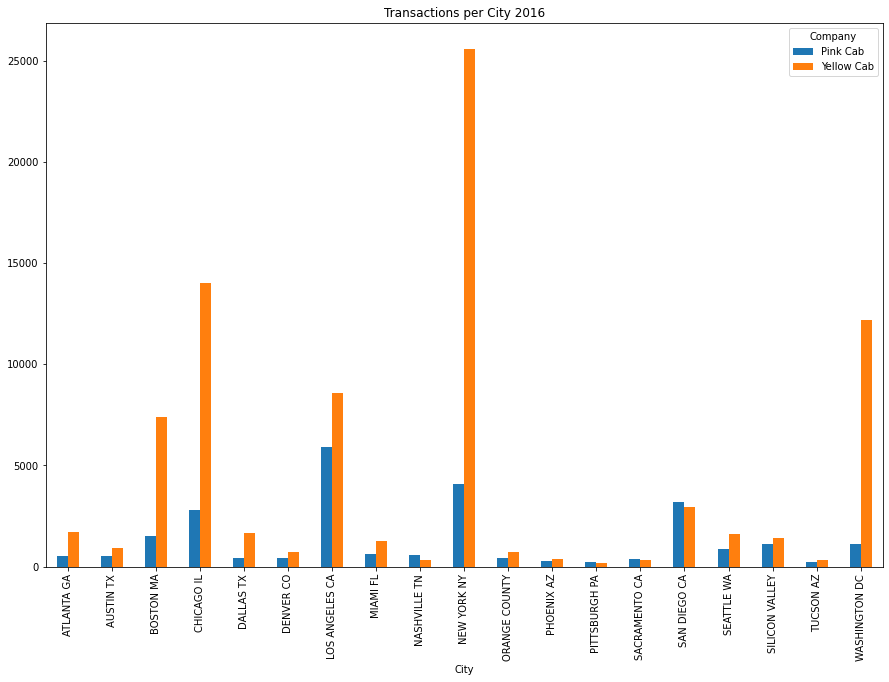

Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA           524        1713
AUSTIN TX            541         929
BOSTON MA           1529        7378
CHICAGO IL          2783       13998
DALLAS TX            413        1662
DENVER CO            409         712
LOS ANGELES CA      5896        8568
MIAMI FL             601        1283
NASHVILLE TN         549         345
NEW YORK NY         4062       25582
ORANGE COUNTY        438         737
PHOENIX AZ           257         351
PITTSBURGH PA        209         193
SACRAMENTO CA        389         309
SAN DIEGO CA        3171        2936
SEATTLE WA           845        1601
SILICON VALLEY      1136        1421
TUCSON AZ            235         334
WASHINGTON DC       1093       12187


In [73]:
TotalTrans2016 = df_Everything[df_Everything['Year']==2016].groupby(['City', 'Company'])['Transaction ID'].count().unstack()

TotalTrans2016.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Transactions per City 2016')
plt.show()
print(TotalTrans2016)

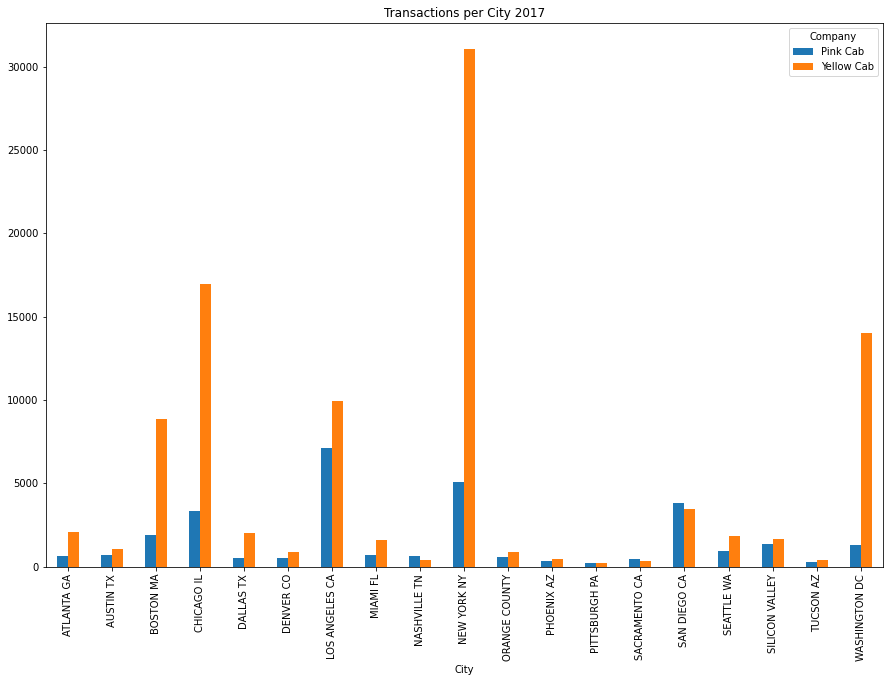

Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA           632        2079
AUSTIN TX            677        1058
BOSTON MA           1883        8878
CHICAGO IL          3317       16954
DALLAS TX            485        2032
DENVER CO            493         870
LOS ANGELES CA      7111        9920
MIAMI FL             709        1607
NASHVILLE TN         653         422
NEW YORK NY         5078       31061
ORANGE COUNTY        551         880
PHOENIX AZ           308         437
PITTSBURGH PA        239         218
SACRAMENTO CA        472         362
SAN DIEGO CA        3826        3469
SEATTLE WA           938        1862
SILICON VALLEY      1349        1646
TUCSON AZ            285         402
WASHINGTON DC       1315       14032


In [72]:
TotalTrans2017 = df_Everything[df_Everything['Year']==2017].groupby(['City', 'Company'])['Transaction ID'].count().unstack()

TotalTrans2017.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Transactions per City 2017')
plt.show()
print(TotalTrans2017)

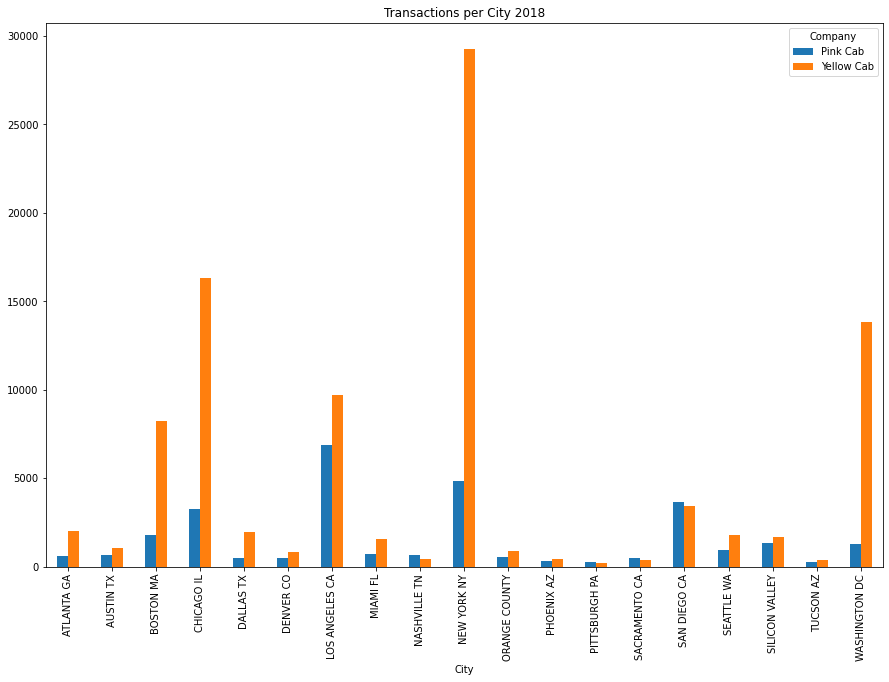

Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA           606        2003
AUSTIN TX            650        1041
BOSTON MA           1774        8250
CHICAGO IL          3261       16312
DALLAS TX            482        1943
DENVER CO            492         849
LOS ANGELES CA      6858        9680
MIAMI FL             692        1562
NASHVILLE TN         639         402
NEW YORK NY         4827       29275
ORANGE COUNTY        524         852
PHOENIX AZ           299         412
PITTSBURGH PA        234         220
SACRAMENTO CA        473         362
SAN DIEGO CA        3675        3411
SEATTLE WA           949        1802
SILICON VALLEY      1312        1655
TUCSON AZ            279         396
WASHINGTON DC       1284       13826


In [71]:
TotalTrans2018 = df_Everything[df_Everything['Year']==2018].groupby(['City', 'Company'])['Transaction ID'].count().unstack()

TotalTrans2018.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Transactions per City 2018')
plt.show()
print(TotalTrans2018)

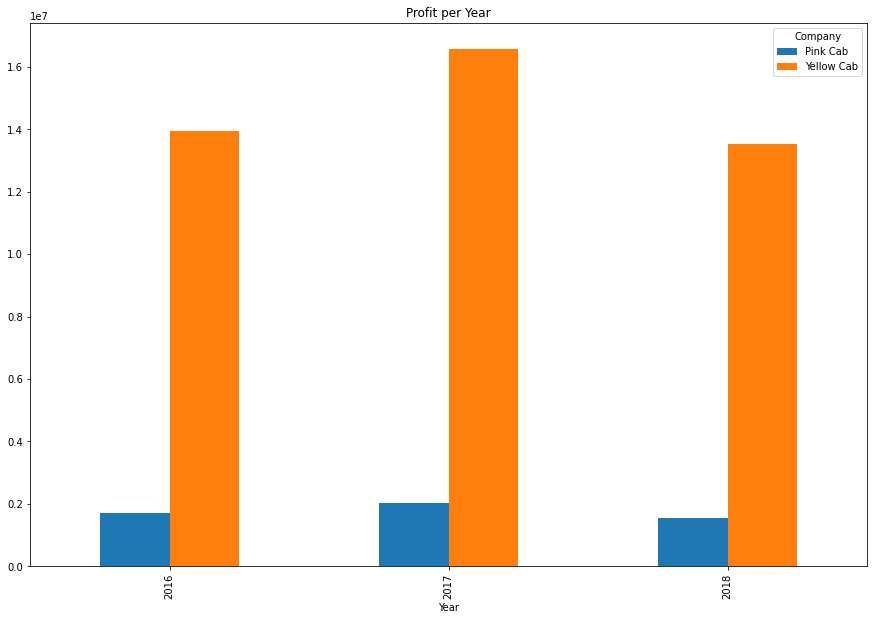

Company     Pink Cab    Yellow Cab
Year                              
2016     1713511.224  1.392700e+07
2017     2033654.908  1.657598e+07
2018     1560162.189  1.351740e+07


In [70]:
YearProfits = df_Everything.groupby(['Year','Company'])['Profits'].sum().unstack()
YearProfits.plot(kind='bar',stacked = False, figsize=(15,10))
plt.title('Profit per Year')
plt.show()
print(YearProfits)

In [48]:
#Statistically significant in favor of Yellow Cab
ttest_ind(YearProfits['Yellow Cab'], YearProfits['Pink Cab'])

Ttest_indResult(statistic=13.321641708361032, pvalue=0.00018356051118382006)

In [20]:
#Yellow 2016 Profits are statistically Significant compared to Pink 2016
ttest_ind(Yellow_2016['Profits'], Pink_2016['Profits'])

Ttest_indResult(statistic=86.46376277034744, pvalue=0.0)

In [21]:
#Yellow 2017 Profits are statistically Significant compared to Pink 2017
ttest_ind(Yellow_2017['Profits'], Pink_2017['Profits'])

Ttest_indResult(statistic=95.84786507735124, pvalue=0.0)

In [22]:
#Yellow 2018 Profits are statistically Significant compared to Pink 2018 and they keep getting more significant
#Every year
ttest_ind(Yellow_2018['Profits'], Pink_2018['Profits'])

Ttest_indResult(statistic=96.67449657638149, pvalue=0.0)

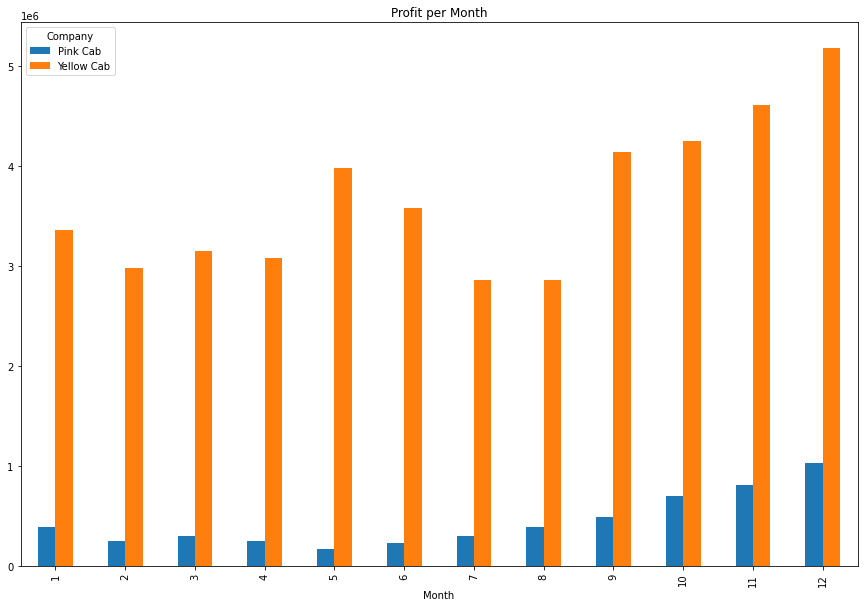

Company     Pink Cab    Yellow Cab
Month                             
1         388054.602  3.358436e+06
2         252041.309  2.975979e+06
3         299096.571  3.151215e+06
4         245818.095  3.075543e+06
5         168613.914  3.983544e+06
6         232715.233  3.580338e+06
7         301885.097  2.861562e+06
8         388251.300  2.856271e+06
9         494435.325  4.142382e+06
10        696437.071  4.250512e+06
11        810326.172  4.609321e+06
12       1029653.632  5.175271e+06


In [69]:
MonthProfits = df_Everything.groupby(['Month','Company'])['Profits'].sum().unstack()
MonthProfits.plot(kind='bar',stacked = False, figsize=(15,10))
plt.title('Profit per Month')
plt.show()
print(MonthProfits)

In [44]:
#Yellow has Statistically significantly more profits per month
ttest_ind(MonthProfits['Yellow Cab'], MonthProfits['Pink Cab'])

Ttest_indResult(statistic=13.891586866984023, pvalue=2.2779963273117146e-12)

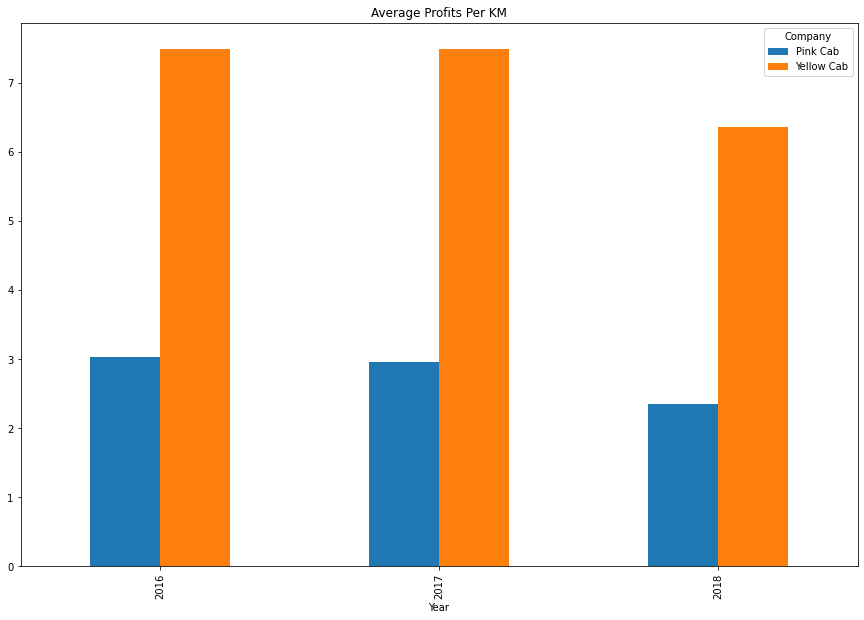

Company  Pink Cab  Yellow Cab
Year                         
2016     3.026813    7.489847
2017     2.962883    7.494612
2018     2.350447    6.364805


In [68]:
AVGProfitsPerKM = df_Everything.groupby(['Year', 'Company'])['Profits Per KM'].mean().unstack()

AVGProfitsPerKM.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Average Profits Per KM')
plt.show()
print(AVGProfitsPerKM)

In [61]:
#Yellow cab has statistically significatly more average Profits per KM
ttest_ind(AVGProfitsPerKM['Yellow Cab'], AVGProfitsPerKM['Pink Cab'])

Ttest_indResult(statistic=10.008728999605962, pvalue=0.0005601083066549304)

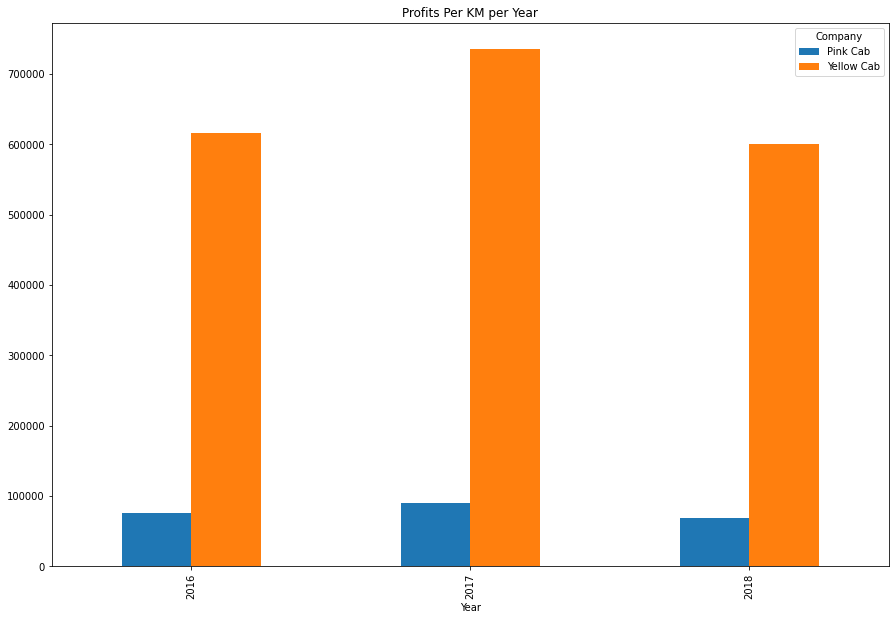

Company      Pink Cab     Yellow Cab
Year                                
2016     75912.471594  615957.547639
2017     89837.565254  735888.502937
2018     68891.614360  599901.939731


In [67]:
ProfitsPerKM = df_Everything.groupby(['Year', 'Company'])['Profits Per KM'].sum().unstack()

ProfitsPerKM.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Profits Per KM per Year')
plt.show()
print(ProfitsPerKM)

In [59]:
#Yellow cab has statistically significatly more Profits per KM
ttest_ind(ProfitsPerKM['Yellow Cab'], ProfitsPerKM['Pink Cab'])

Ttest_indResult(statistic=13.205483645010405, pvalue=0.0001899813092510504)

In [23]:
#Yellow 2016 Profits Per KM are statistically Significant compared to Pink 2016
ttest_ind(Yellow_2016['Profits Per KM'], Pink_2016['Profits Per KM'])

Ttest_indResult(statistic=113.68699463916347, pvalue=0.0)

In [26]:
#Yellow 2017 Profits Per KM are statistically Significant compared to Pink 2017
ttest_ind(Yellow_2017['Profits Per KM'], Pink_2017['Profits Per KM'])

Ttest_indResult(statistic=127.01978928133332, pvalue=0.0)

In [27]:
#Yellow 2018 Profits Per KM are statistically Significant compared to Pink 2018
ttest_ind(Yellow_2018['Profits Per KM'], Pink_2018['Profits Per KM'])

Ttest_indResult(statistic=126.7189163746732, pvalue=0.0)

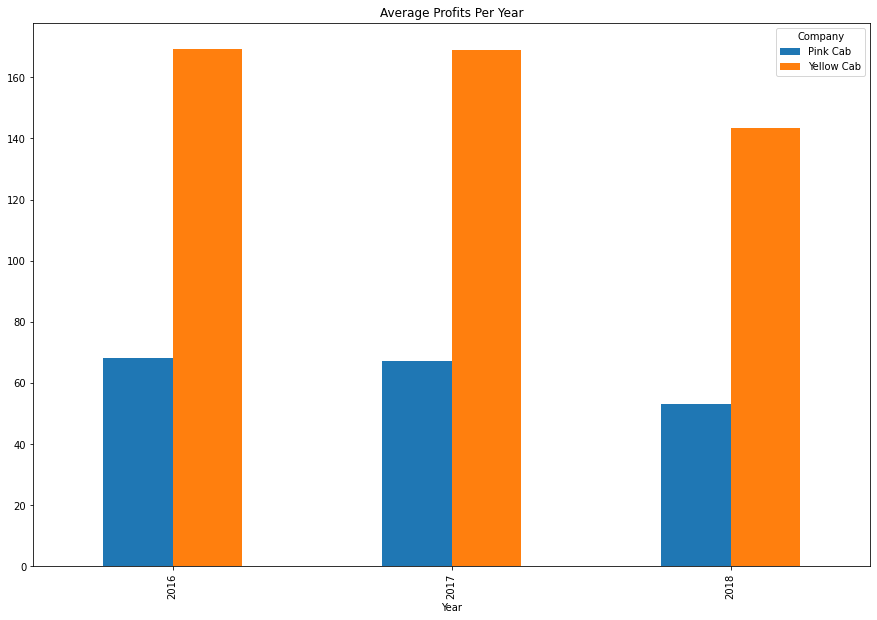

Company   Pink Cab  Yellow Cab
Year                          
2016     68.321819  169.347821
2017     67.070839  168.817057
2018     53.229689  143.416122


In [66]:
AVGProfitsYear = df_Everything.groupby(['Year', 'Company'])['Profits'].mean().unstack()

AVGProfitsYear.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Average Profits Per Year')
plt.show()
print(AVGProfitsYear)

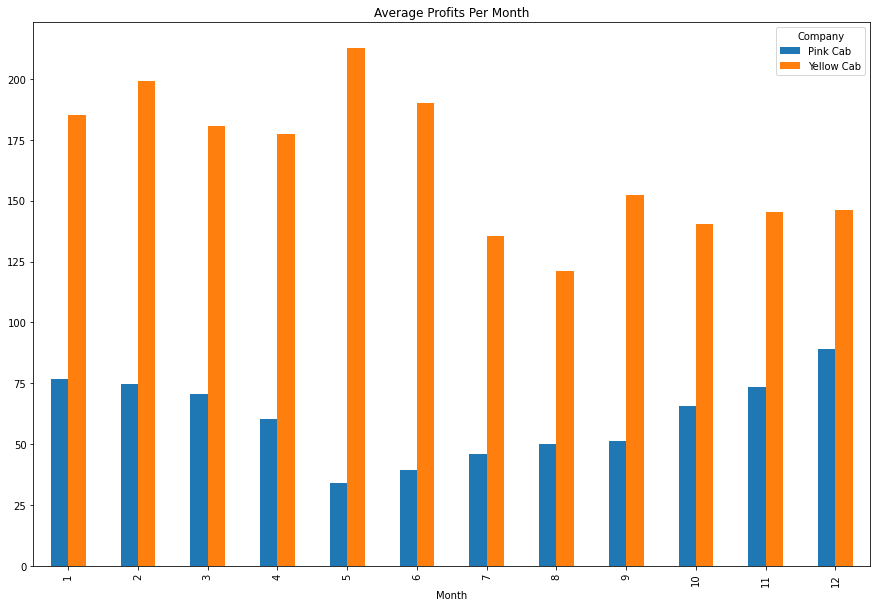

Company   Pink Cab  Yellow Cab
Month                         
1        76.736129  185.374826
2        74.678906  199.302085
3        70.825615  180.865227
4        60.205265  177.254502
5        33.994741  212.557685
6        39.597623  190.079552
7        45.809575  135.709081
8        50.168148  121.110536
9        51.194380  152.287874
10       65.850706  140.392116
11       73.632546  145.427395
12       89.008786  146.033211


In [65]:
AVGProfitsMonth = df_Everything.groupby(['Month', 'Company'])['Profits'].mean().unstack()

AVGProfitsMonth.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Average Profits Per Month')
plt.show()
print(AVGProfitsMonth)

In [33]:
#Yellow cab has statistically significantly more AVGProfits per Month
ttest_ind(AVGProfitsMonth['Yellow Cab'], AVGProfitsMonth['Pink Cab'])

Ttest_indResult(statistic=10.828787567416464, pvalue=2.7814081844349664e-10)

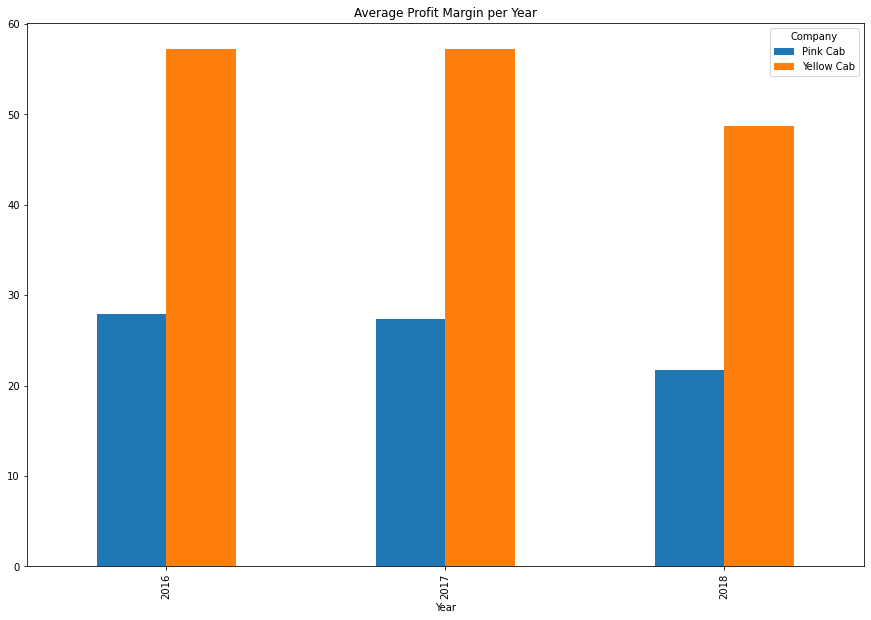

Company   Pink Cab  Yellow Cab
Year                          
2016     27.910304   57.214209
2017     27.319440   57.244999
2018     21.727509   48.679429


In [112]:
ProfitPercentagePerYear = df_Everything.groupby(['Year', 'Company'])['Profit Percentage'].mean().unstack()

ProfitPercentagePerYear.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Average Profit Margin per Year')
plt.show()
print(ProfitPercentagePerYear)

In [92]:
#Yellow cab has statistically significant average profit percentage per year
ttest_ind(ProfitPercentagePerYear['Yellow Cab'], ProfitPercentagePerYear['Pink Cab'])

Ttest_indResult(statistic=8.291691357721282, pvalue=0.0011550420947232171)

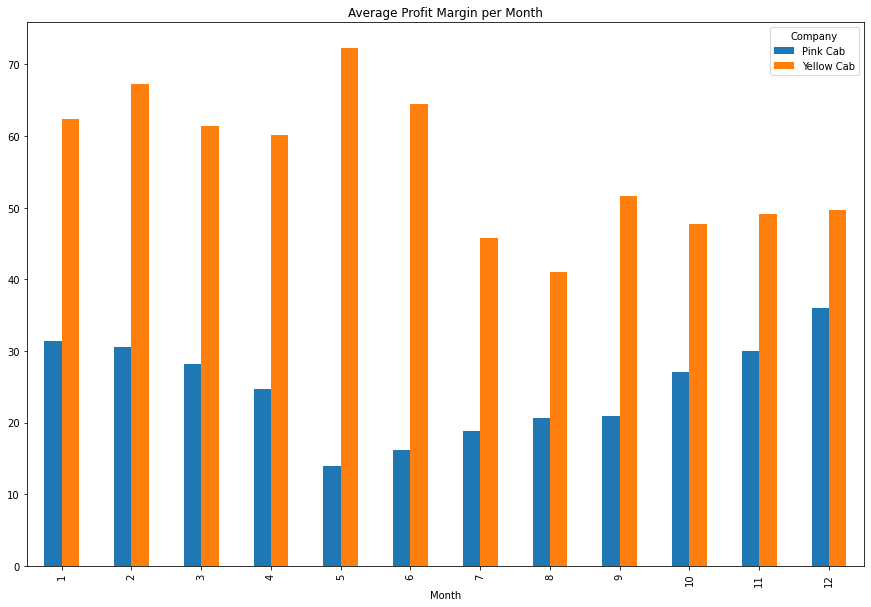

Company   Pink Cab  Yellow Cab
Month                         
1        31.379225   62.344276
2        30.510803   67.325596
3        28.194745   61.416138
4        24.673642   60.141515
5        13.966183   72.246836
6        16.145145   64.430883
7        18.890185   45.815899
8        20.597013   41.096155
9        20.942628   51.643093
10       27.015225   47.672899
11       30.056943   49.064667
12       36.040060   49.657382


In [113]:
ProfitPercentagePerMonth = df_Everything.groupby(['Month', 'Company'])['Profit Percentage'].mean().unstack()

ProfitPercentagePerMonth.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Average Profit Margin per Month')
plt.show()
print(ProfitPercentagePerMonth)

In [95]:
#Yellow cab has statistically significant average profit percentage per Month
ttest_ind(ProfitPercentagePerMonth['Yellow Cab'], ProfitPercentagePerMonth['Pink Cab'])

Ttest_indResult(statistic=9.081132116478202, pvalue=6.7657308653894465e-09)

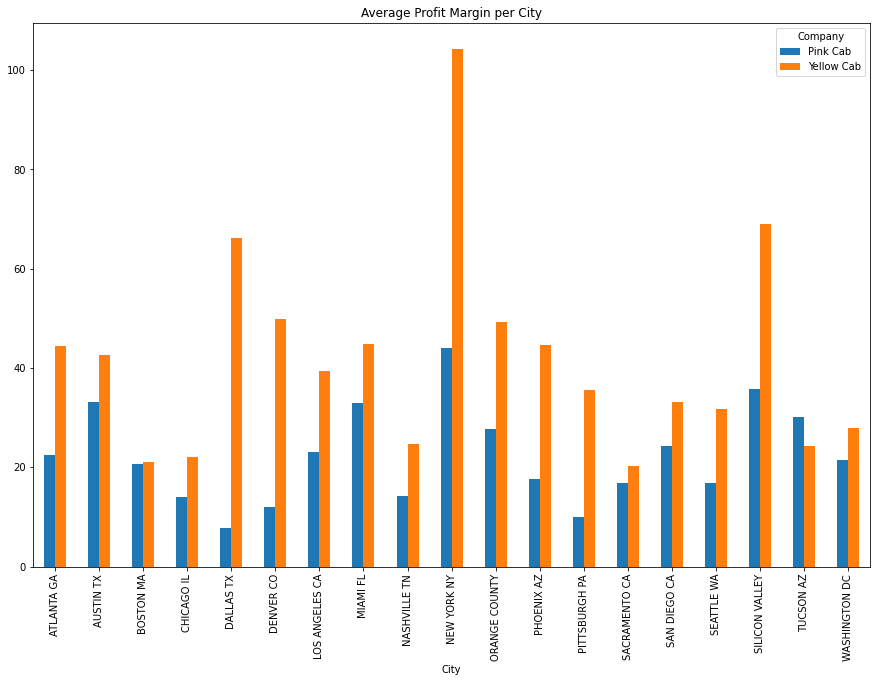

Company          Pink Cab  Yellow Cab
City                                 
ATLANTA GA      22.366576   44.345863
AUSTIN TX       33.124570   42.639859
BOSTON MA       20.682036   20.991244
CHICAGO IL      14.062613   22.053429
DALLAS TX        7.834718   66.155995
DENVER CO       11.961548   49.940618
LOS ANGELES CA  23.113694   39.375101
MIAMI FL        33.004664   44.901656
NASHVILLE TN    14.243584   24.621837
NEW YORK NY     43.993889  104.267068
ORANGE COUNTY   27.625281   49.202086
PHOENIX AZ      17.621781   44.625587
PITTSBURGH PA   10.006572   35.601659
SACRAMENTO CA   16.840577   20.150114
SAN DIEGO CA    24.370124   33.045469
SEATTLE WA      16.926940   31.730163
SILICON VALLEY  35.828903   68.979035
TUCSON AZ       30.074783   24.314928
WASHINGTON DC   21.366713   27.915416


In [114]:
ProfitPercentagePerCity = df_Everything.groupby(['City', 'Company'])['Profit Percentage'].mean().unstack()

ProfitPercentagePerCity.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Average Profit Margin per City')
plt.show()
print(ProfitPercentagePerCity)

In [97]:
#Yellow cab has statistically significant average profit percentage per Month
ttest_ind(ProfitPercentagePerCity['Yellow Cab'], ProfitPercentagePerCity['Pink Cab'])

Ttest_indResult(statistic=3.722332601365823, pvalue=0.0006720879618058299)

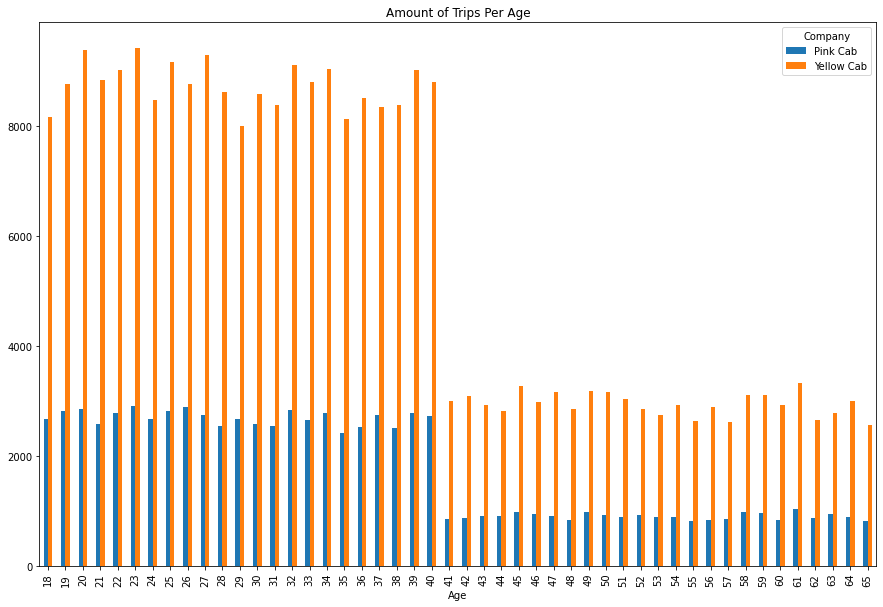

Company  Pink Cab  Yellow Cab
Age                          
18           2676        8170
19           2821        8770
20           2853        9376
21           2590        8841
22           2783        9013
23           2913        9414
24           2670        8481
25           2814        9159
26           2894        8761
27           2738        9292
28           2543        8620
29           2672        8003
30           2586        8579
31           2541        8389
32           2841        9118
33           2654        8803
34           2789        9036
35           2420        8135
36           2534        8520
37           2742        8344
38           2516        8390
39           2785        9013
40           2734        8802
41            854        2998
42            880        3090
43            902        2921
44            903        2822
45            980        3268
46            941        2977
47            917        3170
48            845        2855
49        

In [29]:
AgeTrips = df_Everything.groupby(['Age', 'Company'])['Transaction ID'].count().unstack()

AgeTrips.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Amount of Trips Per Age')
plt.show()
print(AgeTrips)

In [31]:
#Yellow Cab is getting statistically significantly more trips at each age
ttest_ind(AgeTrips['Yellow Cab'], AgeTrips['Pink Cab'])

Ttest_indResult(statistic=8.902238764711376, pvalue=3.964871897976296e-14)

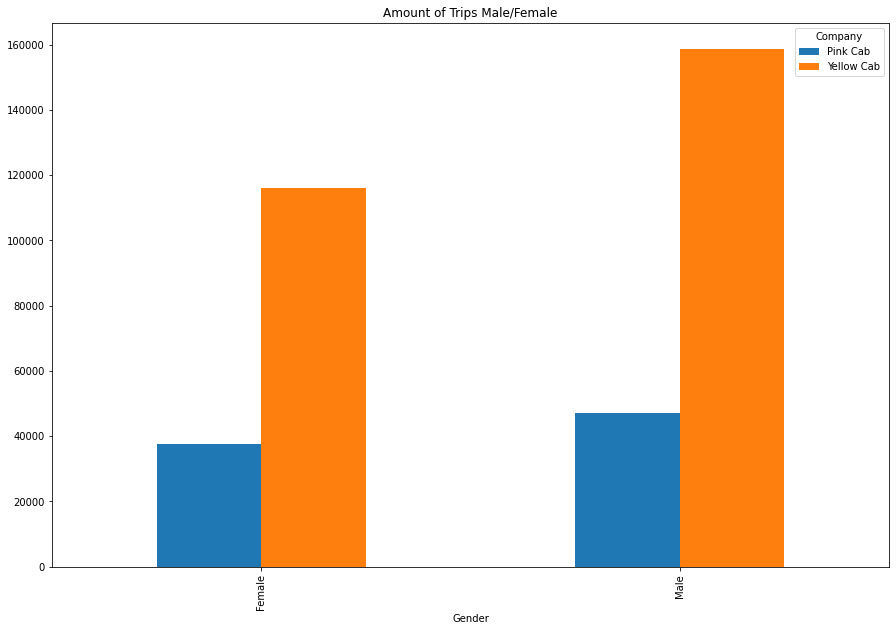

Company  Pink Cab  Yellow Cab
Gender                       
Female      37480      116000
Male        47231      158681


In [110]:
GenderTrips = df_Everything.groupby(['Gender', 'Company'])['Transaction ID'].count().unstack()

GenderTrips.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Amount of Trips Male/Female')
plt.show()
print(GenderTrips)

In [64]:
#Yellow cab is pulling a statistically significant amount more of each gender
ttest_ind(GenderTrips['Yellow Cab'], GenderTrips['Pink Cab'])

Ttest_indResult(statistic=4.339126522769509, pvalue=0.04922373545914366)

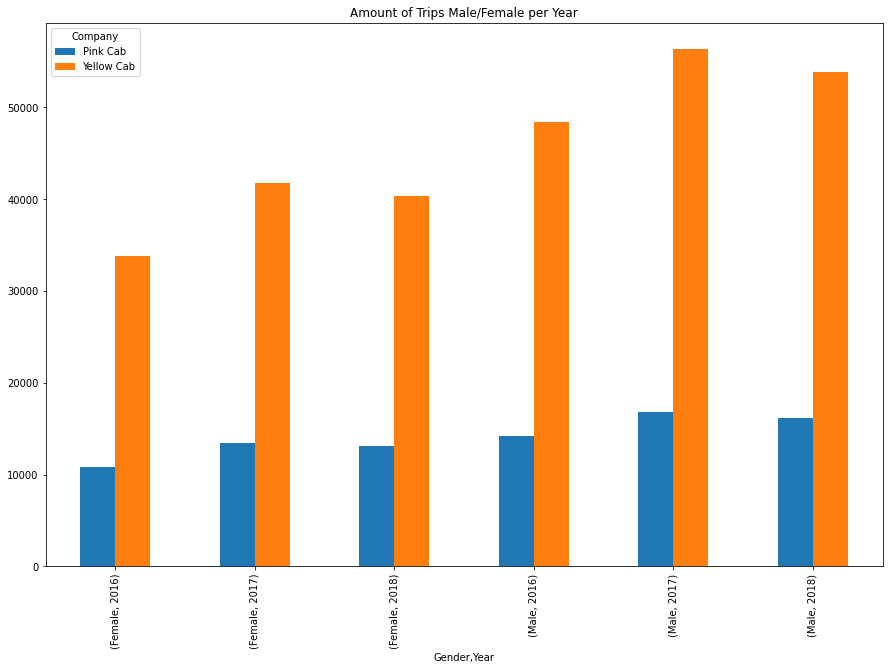

Company      Pink Cab  Yellow Cab
Gender Year                      
Female 2016     10873       33861
       2017     13475       41785
       2018     13132       40354
Male   2016     14207       48378
       2017     16846       56404
       2018     16178       53899


In [86]:
GenderTripsYear = df_Everything.groupby(['Gender', 'Year', 'Company'])['Transaction ID'].count().unstack()

GenderTripsYear.plot(kind='bar', stacked = False, figsize=(15,10))
plt.title('Amount of Trips Male/Female per Year')
plt.show()
print(GenderTripsYear)

In [87]:
#Yellow cab is pulling a statistically significant amount more of each gender each year
ttest_ind(GenderTripsYear['Yellow Cab'], GenderTripsYear['Pink Cab'])

Ttest_indResult(statistic=8.707878556515231, pvalue=5.5617167470592215e-06)